In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
x=iris.data
y=iris.target

In [5]:
from sklearn.decomposition import PCA

### setp1.  開PCA 機

In [6]:
pca=PCA(n_components=2)

### step2. 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### step3. 預測

In [9]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [10]:
X=pca.transform(x)

In [12]:
X[87]

array([ 0.81509524, -0.37203706])

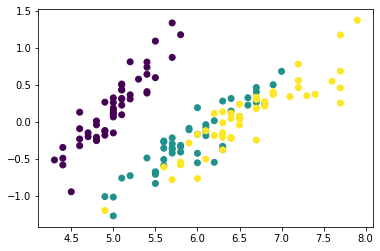

In [13]:
plt.scatter(x[:,0],X[:,1],c=y)

### 準備訓練/測試資料

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### step 1:開SVC函數學習機

In [16]:
from sklearn.svm import SVC

In [18]:
clf=SVC(gamma="auto")

### step2:訓練

In [19]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step3:預測

In [20]:
y_predict=clf.predict(x_test)

In [21]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

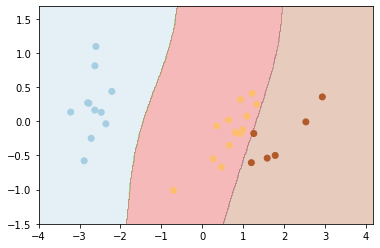

In [24]:
x0=np.arange(-4,4.2,0.02)
y0=np.arange(-1.5,1.7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap="Paired")

## K-Means 自動分類

In [25]:
x= np.random.rand(100,2)

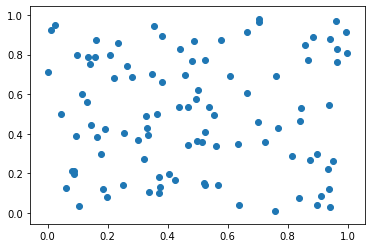

In [28]:
plt.scatter(x[:,0],x[:,1])

### step1.打開K-Means 學習機

In [29]:
from sklearn.cluster import KMeans

In [32]:
clf= KMeans(n_clusters=3)

### step2.學習/訓練

In [33]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step3.預測

In [34]:
clf.predict(x)

array([0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1], dtype=int32)

In [35]:
clf.labels_

array([0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1])

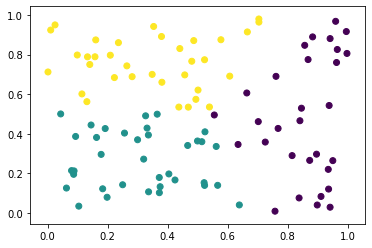

In [37]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

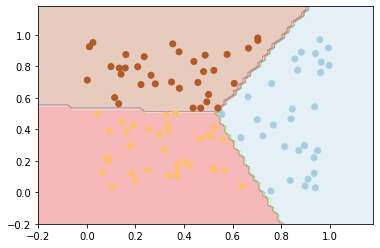

In [45]:
x0=y0=np.arange(-0.2,1.2,0.02)
xm,ym=np.meshgrid(x0,y0)

P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

## "make_blots" 生更像真實世界的數據

In [46]:
from sklearn.datasets.samples_generator import make_blobs

In [49]:
x,y=make_blobs(n_samples=500,centers=3,n_features=2,random_state=0)

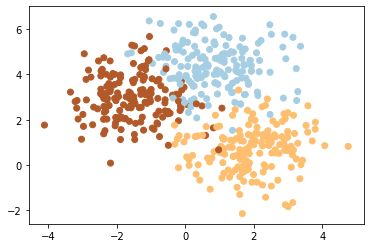

In [50]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired")

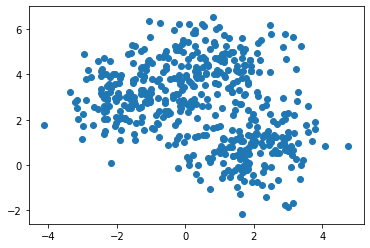

In [53]:
plt.scatter(x[:,0],x[:,1])

### Step1.開K-Means 函數學習機

In [57]:
clf=KMeans(n_clusters=3)

### Step2.訓練

In [58]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step3.預測

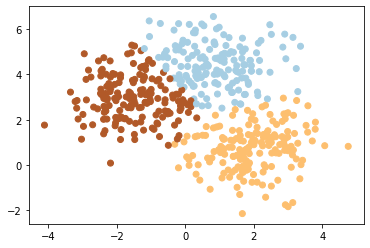

In [60]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired") ### 自己分邊界比較好